In [90]:
#imports
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
from os import mkdir
from PIL import Image

#-------------------------------------------Opening and sorting test images------------------------------------------
#test image extraction
file = './input/emnist-balanced-test-images-idx3-ubyte'
arr_ = idx2numpy.convert_from_file(file)

#test label extraction
file = './input/emnist-balanced-test-labels-idx1-ubyte'
arrLabels_ = idx2numpy.convert_from_file(file)

#filling test folder
#creating classification folders
for i in range(len(arrLabels_)):
    try:
        mkdir('./input/test/group_'+str(arrLabels_[i]))
    except:
        pass
        
#adding images to propper folder
for i in range(len(arr_)):
    im = Image.fromarray(arr_[i])#create PIL.Image object
    im.save('./input/test/group_'+str(arrLabels_[i])+'/'+str(i)+'.png')
    
    
#------------------------------------------Opening and sorting train images------------------------------------------   
#train image extraction
file = './input/emnist-balanced-train-images-idx3-ubyte'
arr = idx2numpy.convert_from_file(file)

#train label extraction
file = './input/emnist-balanced-train-labels-idx1-ubyte'
arrLabels = idx2numpy.convert_from_file(file)

#filling train folder
#creating classification folders
for i in range(len(arrLabels)):
    try:
        mkdir('./input/train/group_'+str(arrLabels[i]))
    except:
        pass
        
#adding images to propper folder
for i in range(len(arr)):
    im = Image.fromarray(arr[i])#create PIL.Image object
    im.save('./input/train/group_'+str(arrLabels[i])+'/'+str(i)+'.png')

    

print('done')

(112800,)
[45 36 43 ... 23 31  8]
(112800, 28, 28)


In [ ]:
Auto ML:

In [ ]:
import autokeras as ak

# Initialize the image classifier.
clf = ak.ImageClassifier(overwrite=True, max_trials=10)
# Feed the image classifier with training data.
clf.fit(arr, arrLabels, epochs=1)

Trial 1 Complete [00h 01m 43s]
val_loss: 0.4992660582065582

Best val_loss So Far: 0.4992660582065582
Total elapsed time: 00h 01m 43s

Search: Running Trial #2

Hyperparameter    |Value             |Best Value So Far 
image_block_1/b...|resnet            |vanilla           
image_block_1/n...|True              |True              
image_block_1/a...|True              |False             
image_block_1/i...|True              |None              
image_block_1/i...|True              |None              
image_block_1/i...|0                 |None              
image_block_1/i...|0                 |None              
image_block_1/i...|0.1               |None              
image_block_1/i...|0                 |None              
image_block_1/r...|False             |None              
image_block_1/r...|resnet50          |None              
image_block_1/r...|True              |None              
classification_...|global_avg        |flatten           
classification_...|0                 |0.5

In [167]:
#imports
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#create datagen
img_size = (28, 28)
batch_size = 30

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.3) # hold back 30% of the images for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    './input/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    './input/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

classnames = list(train_generator.class_indices.keys())
print('Data generators ready')

Getting Data...
Preparing training dataset...
Found 78960 images belonging to 47 classes.
Preparing validation dataset...
Found 33840 images belonging to 47 classes.
Data generators ready


In [168]:
# Define a CNN classifier network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the model as a sequence of layers
model = Sequential()

# The input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
model.add(Conv2D(32, (6, 6), input_shape=train_generator.image_shape, activation='relu'))

# Next we'll add a max pooling layer with a 2x2 patch
model.add(MaxPooling2D(pool_size=(2,2)))

# We can add as many layers as we think necessary - here we'll add another convolution and max pooling layer
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# And another set
model.add(Conv2D(32, (6, 6), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# A dropout layer randomly drops some nodes to reduce inter-dependencies (which can cause over-fitting)
model.add(Dropout(0.2))

# Flatten the feature maps 
model.add(Flatten())

# Generate a fully-connected output layer with a predicted probability for each class
# (softmax ensures all probabilities sum to 1)
model.add(Dense(train_generator.num_classes, activation='softmax'))

# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 23, 23, 32)        3488      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 32)          36896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          36896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 32)          0

In [176]:
#imports
import matplotlib.pyplot as plt

num_epochs = 75

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)
print('done')

NameError: name 'model' is not defined

In [ ]:
Graphs accuracy overy epochs:

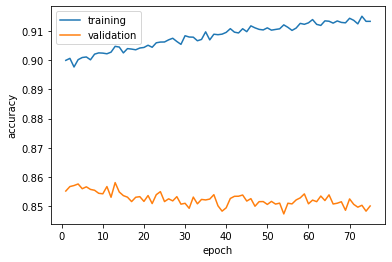

In [172]:
epoch_nums = range(1,num_epochs+1)
training_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]
plt.plot(epoch_nums, training_accuracy)
plt.plot(epoch_nums, validation_accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [173]:
modelFileName = 'Handwriting _classifier_balanced_3.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as' + modelFileName)

model saved asHandwriting _classifier_balanced_3.h5
